In [6]:
from DataInvestigator import DataInvestigator

import pandas as pd
import matplotlib.pyplot as plt

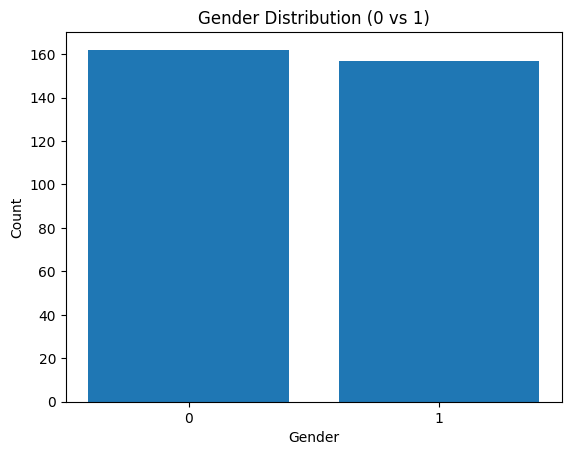

In [7]:
df = pd.read_csv('gallstone.csv')
di = DataInvestigator(df)

gender_counts = df.iloc[:, 2].value_counts()
plt.bar(gender_counts.index.astype(str), gender_counts.values)
plt.title('Gender Distribution (0 vs 1)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


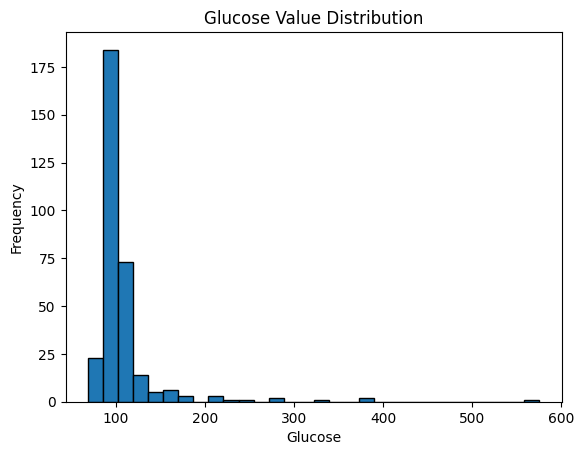

In [8]:
glucose_counts = df.iloc[:, 26].value_counts()

plt.hist(df.iloc[:, 26], bins=30, edgecolor='black')
plt.title('Glucose Value Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()